In [17]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy
# Import the datetime module from the datetime library.
from datetime import datetime
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [18]:
# create a set of random latitude and longtitude combinations
lats = np.random.uniform(low=-90.000, high=90.000,size=1500)
lngs = np.random.uniform(low=-180.000,high=180.000, size =1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [19]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [20]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a8c65b0e6c953d3fae8bc3843ea31586


In [21]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

638

In [22]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
# loop through all the cities in our list
for i in range(len(cities)):
    
    # Group cities in sets of 50 for logging purposes
    if (i% 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # create endpoint url with each city
    city_url = url + "&q=" + cities[i]

Beginning Data Retrieval     
-----------------------------


In [24]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 39 of Set 25 | lorengau
Processing Record 40 of Set 25 | mayo
Processing Record 41 of Set 25 | ushuaia
Processing Record 42 of Set 25 | caravelas
Processing Record 43 of Set 25 | rikitea
Processing Record 44 of Set 25 | olinda
Processing Record 45 of Set 25 | ponta do sol
Processing Record 46 of Set 25 | vaini
Processing Record 47 of Set 25 | kaoma
Processing Record 48 of Set 25 | pirovskoye
Processing Record 49 of Set 25 | takaka
Processing Record 50 of Set 25 | nouadhibou
Processing Record 51 of Set 25 | aksu
Processing Record 52 of Set 25 | ishigaki
Processing Record 53 of Set 25 | punta arenas
Processing Record 54 of Set 25 | kangaatsiaq
Processing Record 55 of Set 25 | bredasdorp
Processing Record 56 of Set 25 | belushya guba
City not found. Skipping...
Processing Record 57 of Set 25 | kapaa
Processing Record 58 of Set 25 | puerto ayora
Processing Record 59 of Set 25 | khash
Processing Record 60 of Set 25 | new norfolk
Processing Record 61 of Set 25 | rawson
Proc

Processing Record 35 of Set 28 | cimitarra
Processing Record 36 of Set 28 | ribeira grande
Processing Record 37 of Set 28 | talavera
Processing Record 38 of Set 28 | chiredzi
Processing Record 39 of Set 28 | esso
Processing Record 40 of Set 28 | mahanoro
Processing Record 41 of Set 28 | vigrestad
Processing Record 42 of Set 28 | tigzirt
Processing Record 43 of Set 28 | saint-augustin
Processing Record 44 of Set 28 | maningrida
Processing Record 45 of Set 28 | caruray
Processing Record 46 of Set 28 | pangnirtung
Processing Record 47 of Set 28 | husavik
Processing Record 48 of Set 28 | margate
Processing Record 49 of Set 28 | san quintin
Processing Record 50 of Set 28 | kieta
Processing Record 1 of Set 29 | mersing
Processing Record 2 of Set 29 | meadow lake
Processing Record 3 of Set 29 | barentsburg
City not found. Skipping...
Processing Record 4 of Set 29 | cabo san lucas
Processing Record 5 of Set 29 | busselton
Processing Record 6 of Set 29 | dujuma
City not found. Skipping...
Proce

Processing Record 24 of Set 32 | petropavlovsk-kamchatskiy
Processing Record 25 of Set 32 | san carlos de bariloche
Processing Record 26 of Set 32 | belmonte
Processing Record 27 of Set 32 | koungou
Processing Record 28 of Set 32 | codrington
Processing Record 29 of Set 32 | yar-sale
Processing Record 30 of Set 32 | mahajanga
Processing Record 31 of Set 32 | san pedro
Processing Record 32 of Set 32 | acapulco
Processing Record 33 of Set 32 | castro
Processing Record 34 of Set 32 | vila
Processing Record 35 of Set 32 | tutrakan
Processing Record 36 of Set 32 | gigmoto
Processing Record 37 of Set 32 | fairbanks
Processing Record 38 of Set 32 | lola
Processing Record 39 of Set 32 | bathsheba
Processing Record 40 of Set 32 | mantua
Processing Record 41 of Set 32 | dukat
Processing Record 42 of Set 32 | hofn
Processing Record 43 of Set 32 | sayyan
Processing Record 44 of Set 32 | clyde river
Processing Record 45 of Set 32 | los llanos de aridane
Processing Record 46 of Set 32 | eyl
Processi

Processing Record 5 of Set 36 | irbil
Processing Record 6 of Set 36 | yumen
Processing Record 7 of Set 36 | leninskoye
Processing Record 8 of Set 36 | nemuro
Processing Record 9 of Set 36 | carutapera
Processing Record 10 of Set 36 | rorvik
Processing Record 11 of Set 36 | talcahuano
Processing Record 12 of Set 36 | vanavara
Processing Record 13 of Set 36 | coaticook
Processing Record 14 of Set 36 | kotelnikovo
Processing Record 15 of Set 36 | vila velha
Processing Record 16 of Set 36 | timmins
Processing Record 17 of Set 36 | perth
Processing Record 18 of Set 36 | anori
Processing Record 19 of Set 36 | shihezi
Processing Record 20 of Set 36 | la palma
Processing Record 21 of Set 36 | saint-michel-des-saints
Processing Record 22 of Set 36 | hailar
Processing Record 23 of Set 36 | san juan de los lagos
Processing Record 24 of Set 36 | port-gentil
Processing Record 25 of Set 36 | maceio
Processing Record 26 of Set 36 | wahran
City not found. Skipping...
Processing Record 27 of Set 36 | a

In [25]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Lorengau,-2.0226,147.2712,81.05,78,85,7.72,PG,2021-04-06 20:21:56
1,Mayo,38.8876,-76.5119,71.01,51,1,9.22,US,2021-04-06 20:21:56
2,Ushuaia,-54.8000,-68.3000,51.80,62,75,10.36,AR,2021-04-06 20:21:57
3,Caravelas,-17.7125,-39.2481,78.42,65,0,7.16,BR,2021-04-06 20:21:57
4,Rikitea,-23.1203,-134.9692,76.78,72,9,10.11,PF,2021-04-06 20:21:57
5,Olinda,-8.0089,-34.8553,80.60,65,20,11.50,BR,2021-04-06 20:21:57
6,Ponta Do Sol,32.6667,-17.1000,61.00,68,18,5.01,PT,2021-04-06 20:21:58
7,Vaini,-21.2000,-175.2000,77.00,83,75,6.91,TO,2021-04-06 20:21:58
8,Kaoma,-14.7833,24.8000,67.96,62,84,4.34,ZM,2021-04-06 20:21:58
9,Pirovskoye,57.6267,92.2658,34.97,85,98,9.53,RU,2021-04-06 20:21:59


In [26]:
new_column_order = ["City", "Country", "Date",  "Lat","Lng", "Max Temp","Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Lorengau,PG,2021-04-06 20:21:56,-2.0226,147.2712,81.05,78,85,7.72
1,Mayo,US,2021-04-06 20:21:56,38.8876,-76.5119,71.01,51,1,9.22
2,Ushuaia,AR,2021-04-06 20:21:57,-54.8000,-68.3000,51.80,62,75,10.36
3,Caravelas,BR,2021-04-06 20:21:57,-17.7125,-39.2481,78.42,65,0,7.16
4,Rikitea,PF,2021-04-06 20:21:57,-23.1203,-134.9692,76.78,72,9,10.11


In [27]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [28]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

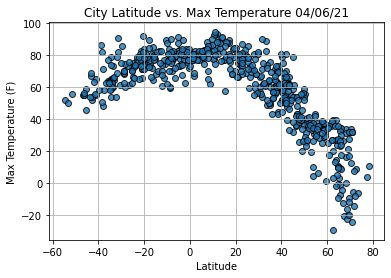

In [29]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

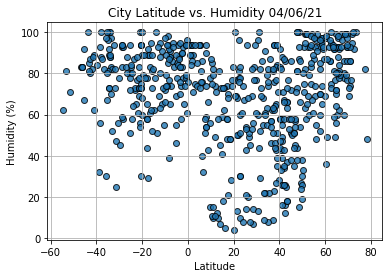

In [30]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

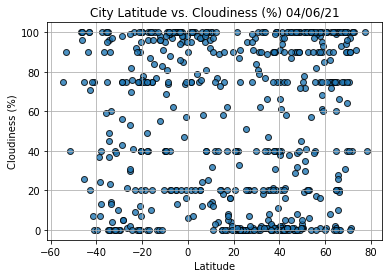

In [31]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

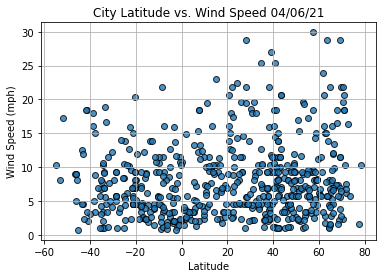

In [32]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [33]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [34]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Mayo,US,2021-04-06 20:21:56,38.8876,-76.5119,71.01,51,1,9.22
6,Ponta Do Sol,PT,2021-04-06 20:21:58,32.6667,-17.1000,61.00,68,18,5.01
9,Pirovskoye,RU,2021-04-06 20:21:59,57.6267,92.2658,34.97,85,98,9.53
11,Nouadhibou,MR,2021-04-06 20:21:59,20.9310,-17.0347,66.20,77,0,16.11
12,Aksu,CN,2021-04-06 20:22:00,41.1231,80.2644,53.08,39,97,7.20


In [35]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

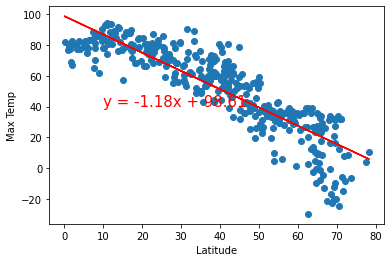

In [37]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

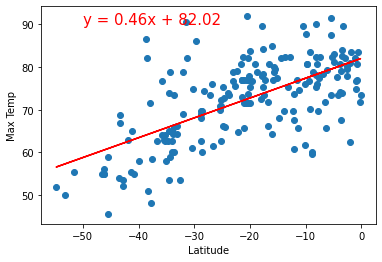

In [38]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

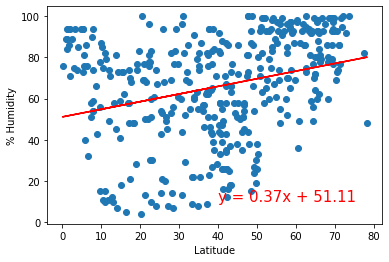

In [39]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

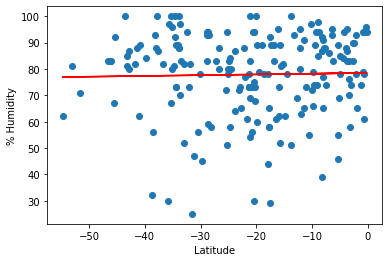

In [42]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))
plt.show()

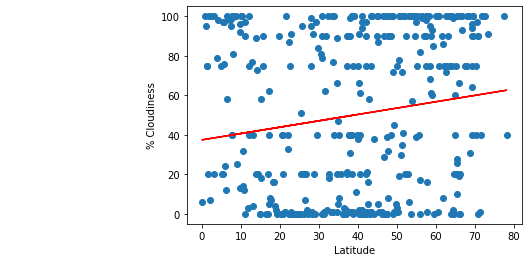

In [44]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

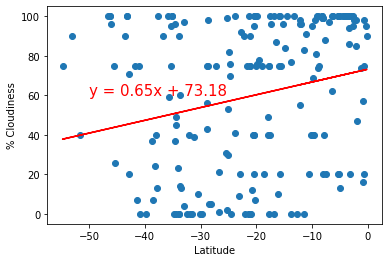

In [45]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

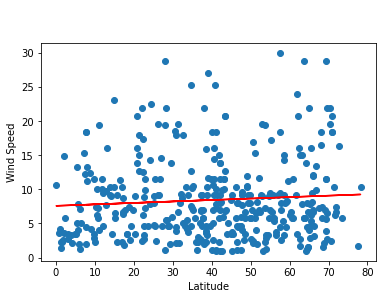

In [46]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \ for Wind Speed', 'Wind Speed',(40,35))

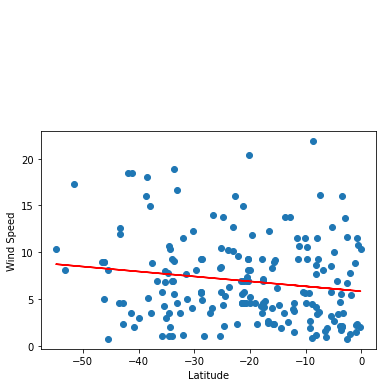

In [47]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))